In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'data')

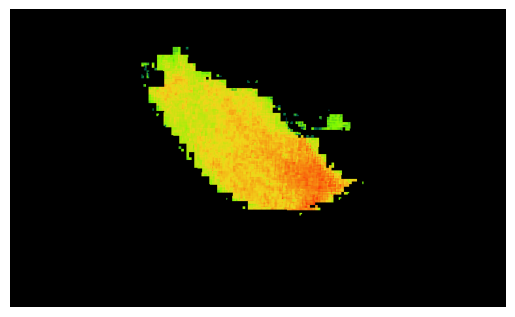

In [31]:
image_path = os.path.join(data_dir, 'sukhna_lake_blackbg_chlorophyll_2020-04-01.npy')

# Load the image from the file
loaded_image = np.load(image_path)

# Plot the image
plt.figure()
plt.imshow(loaded_image)
plt.axis('off')
plt.show()

In [28]:
loaded_image.shape

(456, 759, 4)

```js
function getValue(t) {
    let n, e, r, l, a;
    const B = t.chlIndex,
        u = t.tssIndex,
        o = t.background,
        s = t.foreground,
        c = t.foregroundOpacity,
        i = "undefined" != typeof B18,
        d = getIndices(i),
        f = getBackground(o, d.natural, t.backgroundOpacity);
    if (!isWater(d.watermask, t.watermaskIndices, t.waterMax, t.cloudMax, i)) return f;
    if ("default" !== s) return getForeground(s, f, d.natural, c);
    let g;
    if (null !== B) {
        const r = "default" === B ? i ? "flh" : "mci" : B;
        n = getEval(d.chl[r]), e = getColors("chl", n, t.chlMin, t.chlMax, i && "flh" === r)
    }
    if (null !== u) {
        const n = "default" === u ? i ? "b11" : "b05" : u;
        r = getEval(d.tss[n]), l = getColors("tss", r, t.tssMin, t.tssMax), a = getAlpha(r, t.tssMin, t.tssMax)
    }
    g = null !== B && null !== u ? blend(l, e, a, 100 - a) : null !== B && null === u ? e : null !== u && null === B ? blend(l, f, a, 100 - a) : f;
    const h = parseInt(100 * c);
    return 1 === c ? g : blend(g, f, h, 100 - h)
}
```

El color se calcula usando getColors y luego se hace un blend

```js
function getColors(t, n, e, r, l) {
    let a, B;
    switch (t) {
        case "chl":
            B = [
                [.0034, .0142, .163],
                [0, .416, .306],
                [.486, .98, 0],
                [.9465, .8431, .1048],
                [1, 0, 0]
            ], l && (B = B.reverse(), e *= 10, r /= 10), a = colorBlend(n, [e, e + (r - e) / 3, (e + r) / 2, r - (r - e) / 3, r], B);
            break;
```

sabiendo que el script calcula el color que representa la clorofila así, e es chlMin, r is chlMax, y n el valor, hay que conseguir sacar el valor dado un pixel de una imagen

```js
    chlMin: -0.005,
    chlMax: 0.05,
```

In [5]:
# Define black pixels (assuming RGBA image)
black_pixels_mask = np.all(loaded_image[:, :, :3] == [0, 0, 0], axis=-1) & (loaded_image[:, :, 3] != 0)

# Count black pixels
black_pixels_count = np.sum(black_pixels_mask)

# Count total pixels
total_pixels_count = loaded_image.shape[0] * loaded_image.shape[1]

# Count non-black pixels
non_black_pixels_count = total_pixels_count - black_pixels_count

print(f'Black pixels: {black_pixels_count}')
print(f'Non-black pixels: {non_black_pixels_count}')

Black pixels: 303122
Non-black pixels: 42982


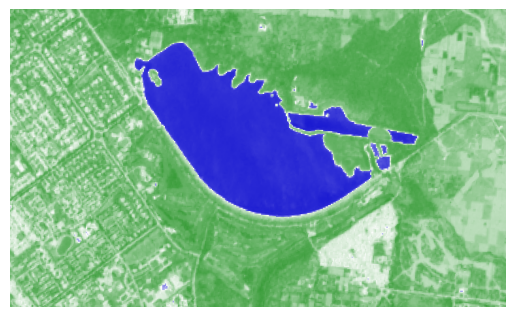

In [30]:
water_image_path = os.path.join(data_dir, 'sukhna_lake_ndwi_2020-04-01.npy')

# Load the image from the file
water_image = np.load(water_image_path)

# Plot the image
plt.figure()
plt.imshow(water_image)
plt.axis('off')
plt.show()

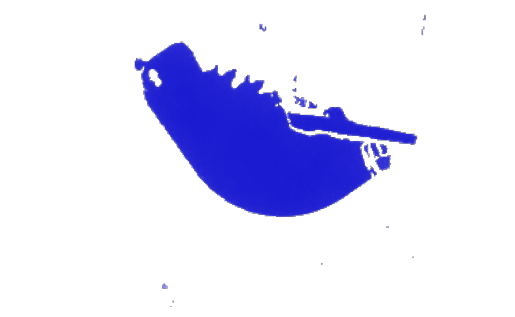

Blue pixels: 55161


In [7]:
# Define blue pixels (assuming RGBA image)
blue_pixels_mask = (water_image[:, :, 2] > water_image[:, :, 0]) & (water_image[:, :, 2] > water_image[:, :, 1]) & (water_image[:, :, 3] != 0)

# Create a copy of the image to modify
blue_image = np.zeros_like(water_image)

# Count blue pixels
blue_pixels_count = np.sum(blue_pixels_mask)

# Apply the mask to keep only blue pixels
blue_image[blue_pixels_mask] = water_image[blue_pixels_mask]

# Convert the result back to an image and save or display it
plt.figure()
plt.imshow(blue_image)
plt.axis('off')
plt.show()

print(f'Blue pixels: {blue_pixels_count}')

In [8]:
# Define the length and width of each pixel in meters
pixel_length = 5  # meters
pixel_width = 5   # meters
pixel_area = pixel_length * pixel_width  # square meters

# Calculate the area of each pixel
non_black_pixels_area = non_black_pixels_count * pixel_area  # square meters
# Calculate the area of each pixel
water_pixels_area = blue_pixels_count * pixel_length * pixel_width  # square meters

print(f'Area of chlorophyll: {non_black_pixels_area} square meters')
print(f'Area of water: {water_pixels_area} square meters')
print(f'Area with chlorophyll: {non_black_pixels_area/water_pixels_area*100} %')

Area of chlorophyll: 1074550 square meters
Area of water: 1379025 square meters
Area with chlorophyll: 77.92099490582115 %


In [23]:
reference_colors = np.array([
    [1, 4, 42],    # Very dark blue
    [0, 106, 78],  # Dark teal
    [124, 250, 0], # Bright yellow-green
    [241, 215, 27],# Mustard yellow
    [255, 0, 0]    # Pure red
])

# Function to categorize a pixel
def categorize_pixel(pixel, reference_colors):
    # Only consider the RGB part of the pixel
    distances = np.linalg.norm(reference_colors - pixel[:3], axis=1)
    return np.argmin(distances)

In [24]:
black_pixels_mask = np.all(loaded_image[:, :, :3] == [0, 0, 0], axis=-1) & (loaded_image[:, :, 3] != 0)

# Define non-black pixels mask
non_black_pixels_mask = ~black_pixels_mask

# Get all non-black pixels
non_black_pixels = loaded_image[non_black_pixels_mask]

# Reshape the non-black pixels array to have the same number of channels as the original image
non_black_pixels = non_black_pixels.reshape(-1, loaded_image.shape[2])

# Print the shape of the non-black pixels array
print(f'Original image shape: {loaded_image.shape}')
print(f'Non-black pixels array shape: {non_black_pixels.shape}')


Original image shape: (456, 759, 4)
Non-black pixels array shape: (42982, 4)


In [25]:
# Categorize each non-black pixel
categorized_pixels = [categorize_pixel(pixel, reference_colors) for pixel in non_black_pixels]

# Initialize an array to store the category of each pixel
categories = np.zeros((loaded_image.shape[0], loaded_image.shape[1]), dtype=int)

# Assign categories back to the original image shape
categories[non_black_pixels_mask] = categorized_pixels

print(f'Categories array shape: {categories.shape}')

Categories array shape: (456, 759)


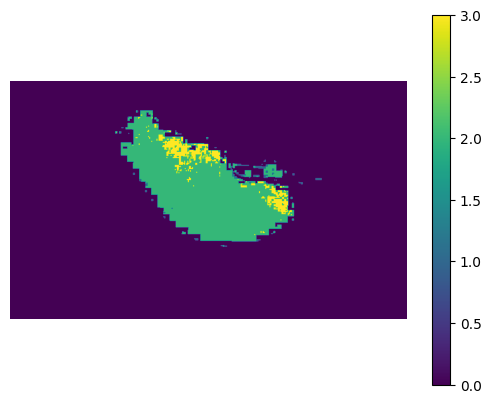

In [26]:
plt.figure()
plt.imshow(categories, cmap='viridis')
plt.axis('off')
plt.colorbar()
plt.show()

In [13]:
# Count the occurrences of each category
category_counts = np.bincount(categorized_pixels, minlength=len(reference_colors))

# Print the counts for each reference color
for i, count in enumerate(category_counts):
    print(f'Reference color {i} (RGB: {reference_colors[i]}): {count} pixels')

Reference color 0 (RGB: [ 1  4 42]): 16 pixels
Reference color 1 (RGB: [  0 106  78]): 902 pixels
Reference color 2 (RGB: [124 250   0]): 37554 pixels
Reference color 3 (RGB: [241 215  27]): 4510 pixels
Reference color 4 (RGB: [255   0   0]): 0 pixels


In [14]:
concentration_values = np.array([0, 0.0125, 0.0250, 0.0375, 0.05]) 

In [15]:
total_concentration = np.sum(category_counts * concentration_values)
print(f'Total concentration: {total_concentration}')
total_volume = total_concentration * pixel_area
print(f'Total MCI (Maximum Chlorophyll Index): {total_volume}')

Total concentration: 1119.25
Total MCI (Maximum Chlorophyll Index): 27981.25
